In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

In [24]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import os

In [25]:
encoder = LabelEncoder()
data = pd.read_csv('labels.csv')
encoder.fit(data['label'])

LabelEncoder()

In [26]:
classes = list(encoder.classes_)
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [27]:
label = encoder.transform(data['label'])
label

array([6, 9, 9, ..., 9, 1, 1])

In [28]:
folder = r'train'
IMG_SIZE = 32
images = []
for img in os.listdir(folder):
    img_path = os.path.join(folder, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    images.append(img_arr)

In [29]:
print(len(images))

50000


In [30]:
x_data = np.array(images)
x_data

array([[[[ 63,  62,  59],
         [ 45,  46,  43],
         [ 43,  48,  50],
         ...,
         [108, 132, 158],
         [102, 125, 152],
         [103, 124, 148]],

        [[ 20,  20,  16],
         [  0,   0,   0],
         [  0,   8,  18],
         ...,
         [ 55,  88, 123],
         [ 50,  83, 119],
         [ 57,  87, 122]],

        [[ 21,  24,  25],
         [  0,   7,  16],
         [  8,  27,  49],
         ...,
         [ 50,  84, 118],
         [ 50,  84, 120],
         [ 42,  73, 109]],

        ...,

        [[ 96, 170, 208],
         [ 34, 153, 201],
         [ 26, 161, 198],
         ...,
         [ 70, 133, 160],
         [  7,  31,  56],
         [ 20,  34,  53]],

        [[ 96, 139, 180],
         [ 42, 123, 173],
         [ 30, 144, 186],
         ...,
         [ 94, 148, 184],
         [ 34,  62,  97],
         [ 34,  53,  83]],

        [[116, 144, 177],
         [ 94, 129, 168],
         [ 87, 142, 179],
         ...,
         [140, 184, 216],
        

In [31]:
y_data = np.array(label)

In [32]:
x_data = x_data/255

In [33]:
x_data.shape

(50000, 32, 32, 3)

In [34]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu, input_shape=(IMG_SIZE,IMG_SIZE,3)),
                            tf.keras.layers.MaxPooling2D((2,2), strides=2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation='softmax')])

In [35]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

In [36]:
cp_callback = tf.keras.callbacks.ModelCheckpoint('cp.ckpt', save_weights_only=True,verbose=1)

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy'])
model.fit(x_data, y_data, epochs=10, batch_size=32,validation_split=0.2, callbacks=[tb_callback, cp_callback])

Epoch 1/10
1250/1250 [==============================] - 59s 46ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.0952

Epoch 00001: saving model to cp.ckpt
Epoch 2/10
1250/1250 [==============================] - 46s 37ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0952

Epoch 00002: saving model to cp.ckpt
Epoch 3/10
1250/1250 [==============================] - 44s 35ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.0952

Epoch 00003: saving model to cp.ckpt
Epoch 4/10
1250/1250 [==============================] - 43s 35ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1002

Epoch 00004: saving model to cp.ckpt
Epoch 5/10
1250/1250 [==============================] - 43s 34ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3031 - val_accuracy: 0.0952

Epoch 00005: saving model to cp.ckpt
Epoch 6/10
1250/1250 [==============================] - 43s 35ms/step - loss: 2.

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

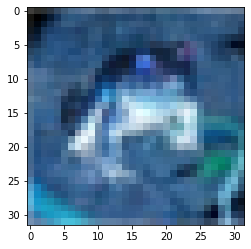

In [41]:
plt.imshow(x_data[0])

In [42]:
m = model.predict(x_data)